In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os 

In [7]:
PUG_ANIMAL_PATH = ""

class UnrealDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform = None):
        self.df = pd.read_csv(csv_path)
        self.df.astype(str)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getIndicesByFactors__(self, world_name="Egypt", character_name="Elephant", character_scale=1.0, character_texture='Default', camera_yaw=0):
        indices = dataset.df[
                            (dataset.df['character_name'] == character_name)                            
                            & ((dataset.df['character_scale'] == character_scale) | (dataset.df['character_scale'] == str(character_scale)))
                            & ((dataset.df['character_texture'] == character_texture) | (dataset.df['character_texture'] == str(character_texture)))
                            & ((dataset.df['camera_yaw'] == camera_yaw) | (dataset.df['camera_yaw'] == str(camera_yaw)))]
        return indices.index.values
    
    def __getitem__(self, index):
        filename = self.df['filename'][index]
        label = self.df['character_name'][index]
        image = Image.open(os.path.join(self.images_folder, self.df['character_name'][index], filename))
        if self.transform is not None:
            image = self.transform(image)
        return image, self.df['world_name'][index], self.df['character_name'][index], self.df['character_scale'][index], self.df['character_texture'][index], self.df['camera_yaw'][index]

dataset = UnrealDataset(csv_path=PUG_ANIMAL_PATH+"labels_pug_animal.csv", images_folder=PUG_ANIMAL_PATH)


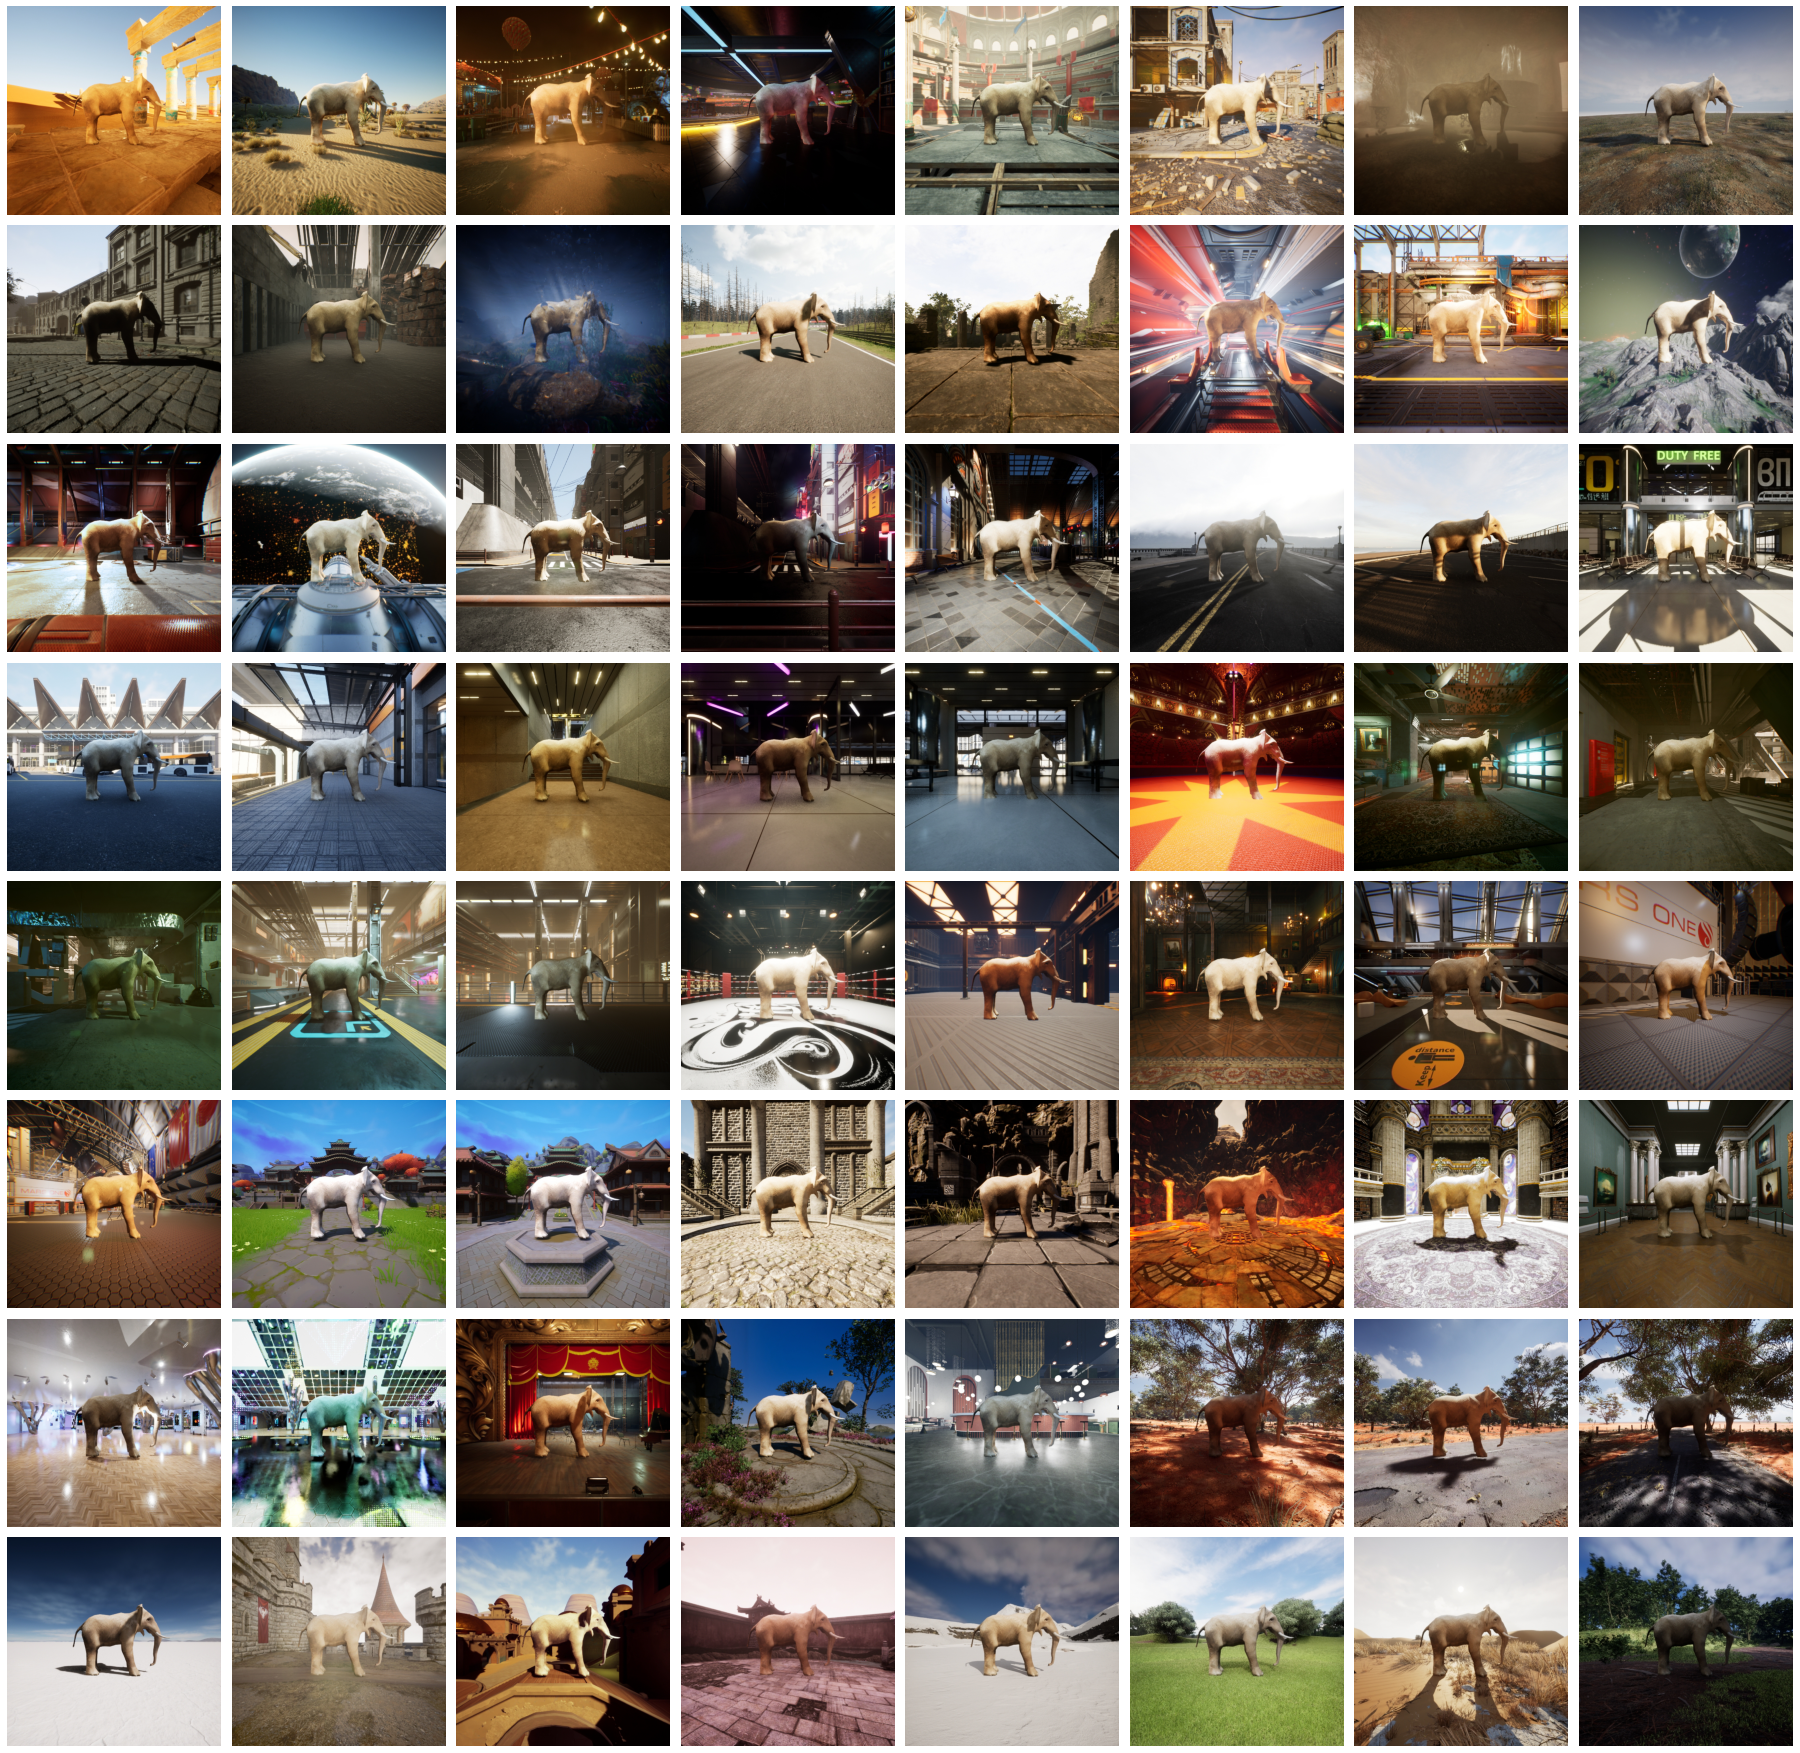

In [9]:
f, axarr = plt.subplots(8,8, figsize=(32,32))
list_world_names = dataset.df["world_name"].unique().tolist()
print()
list_characters_names = dataset.df["character_name"].unique().tolist()
i = 0
j = 0
indexes = dataset.__getIndicesByFactors__(character_name='Elephant')
for k in range(64):
    data = dataset.__getitem__(indexes[k])
    img = data[0]
    axarr[j,i%8].axis('off')
    axarr[j,i%8].imshow(img, aspect="auto")
    i = i + 1
    j = int(i / 8)
f.subplots_adjust(wspace=.05, hspace=.05)
plt.show()
